Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

- Model -- model of the car
- Price  -- Offer Price in EUROs	
- Age_08_04 -- Age in months as in August 2004	
- Mfg_Month -- Manufacturing month (1-12)	
- Mfg_Year	-- Manufacturing Year
- KM -- Accumulated Kilometers on odometer
- Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
- HP -- Horse Power
- Met_Color	 -- Metallic Color?  (Yes=1, No=0)
- Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
- Automatic	-- Automatic ( (Yes=1, No=0)
- cc -- Cylinder Volume in cubic centimeters
- Doors -- Number of doors
- Cylinders	-- Number of cylinders
- Gears -- Number of gear positions
- Quarterly_Tax -- Quarterly road tax in EUROs
- Weight -- Weight in Kilograms
- Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
- BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
- Guarantee_Period -- 	Guarantee period in months
- ABS -- Anti-Lock Brake System (Yes=1, No=0)
- Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
- Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
- Airco -- Airconditioning  (Yes=1, No=0)
- Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
- Boardcomputer -- Boardcomputer  (Yes=1, No=0)
- CD_Player -- CD Player  (Yes=1, No=0)
- Central_Lock -- Central Lock  (Yes=1, No=0)
- Powered_Windows -- Powered Windows  (Yes=1, No=0)
- Power_Steering -- Power Steering  (Yes=1, No=0)
- Radio -- Radio  (Yes=1, No=0)
- Mistlamps	-- Mistlamps  (Yes=1, No=0)
- Sport_Model -- Sport Model  (Yes=1, No=0)
- Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
- Metallic_Rim --Metallic Rim  (Yes=1, No=0)
- Radio_cassette -- Radio Cassette  (Yes=1, No=0)
- Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [56]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid') 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [58]:
tcdata = pd.read_csv("ToyotaCorolla.csv", encoding='latin1')

In [59]:
tcsubset = ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
tcsubset

['Price',
 'Age_08_04',
 'KM',
 'HP',
 'cc',
 'Doors',
 'Gears',
 'Quarterly_Tax',
 'Weight']

In [60]:
tc = tcdata[tcsubset]
tc

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [61]:
tc.describe() #no missing values

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [62]:
tc[tc.duplicated()]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
113  24950          8  13253  116  2000      5      5            234    1320

In [63]:
tc=tc.drop_duplicates().reset_index(drop=True)
tc

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   7500         69  20544   86  1300      3      5             69    1025
1431  10845         72  19000   86  1300      3      5             69    1015
1432   8500         71  17016   86  1300      3      5             69    1015
1433   7250         70  16916   86  1300      3      5             69    1015
1434   6950         76      1  110  1600      5      5             19    1114

[1435 rows x 9 columns]

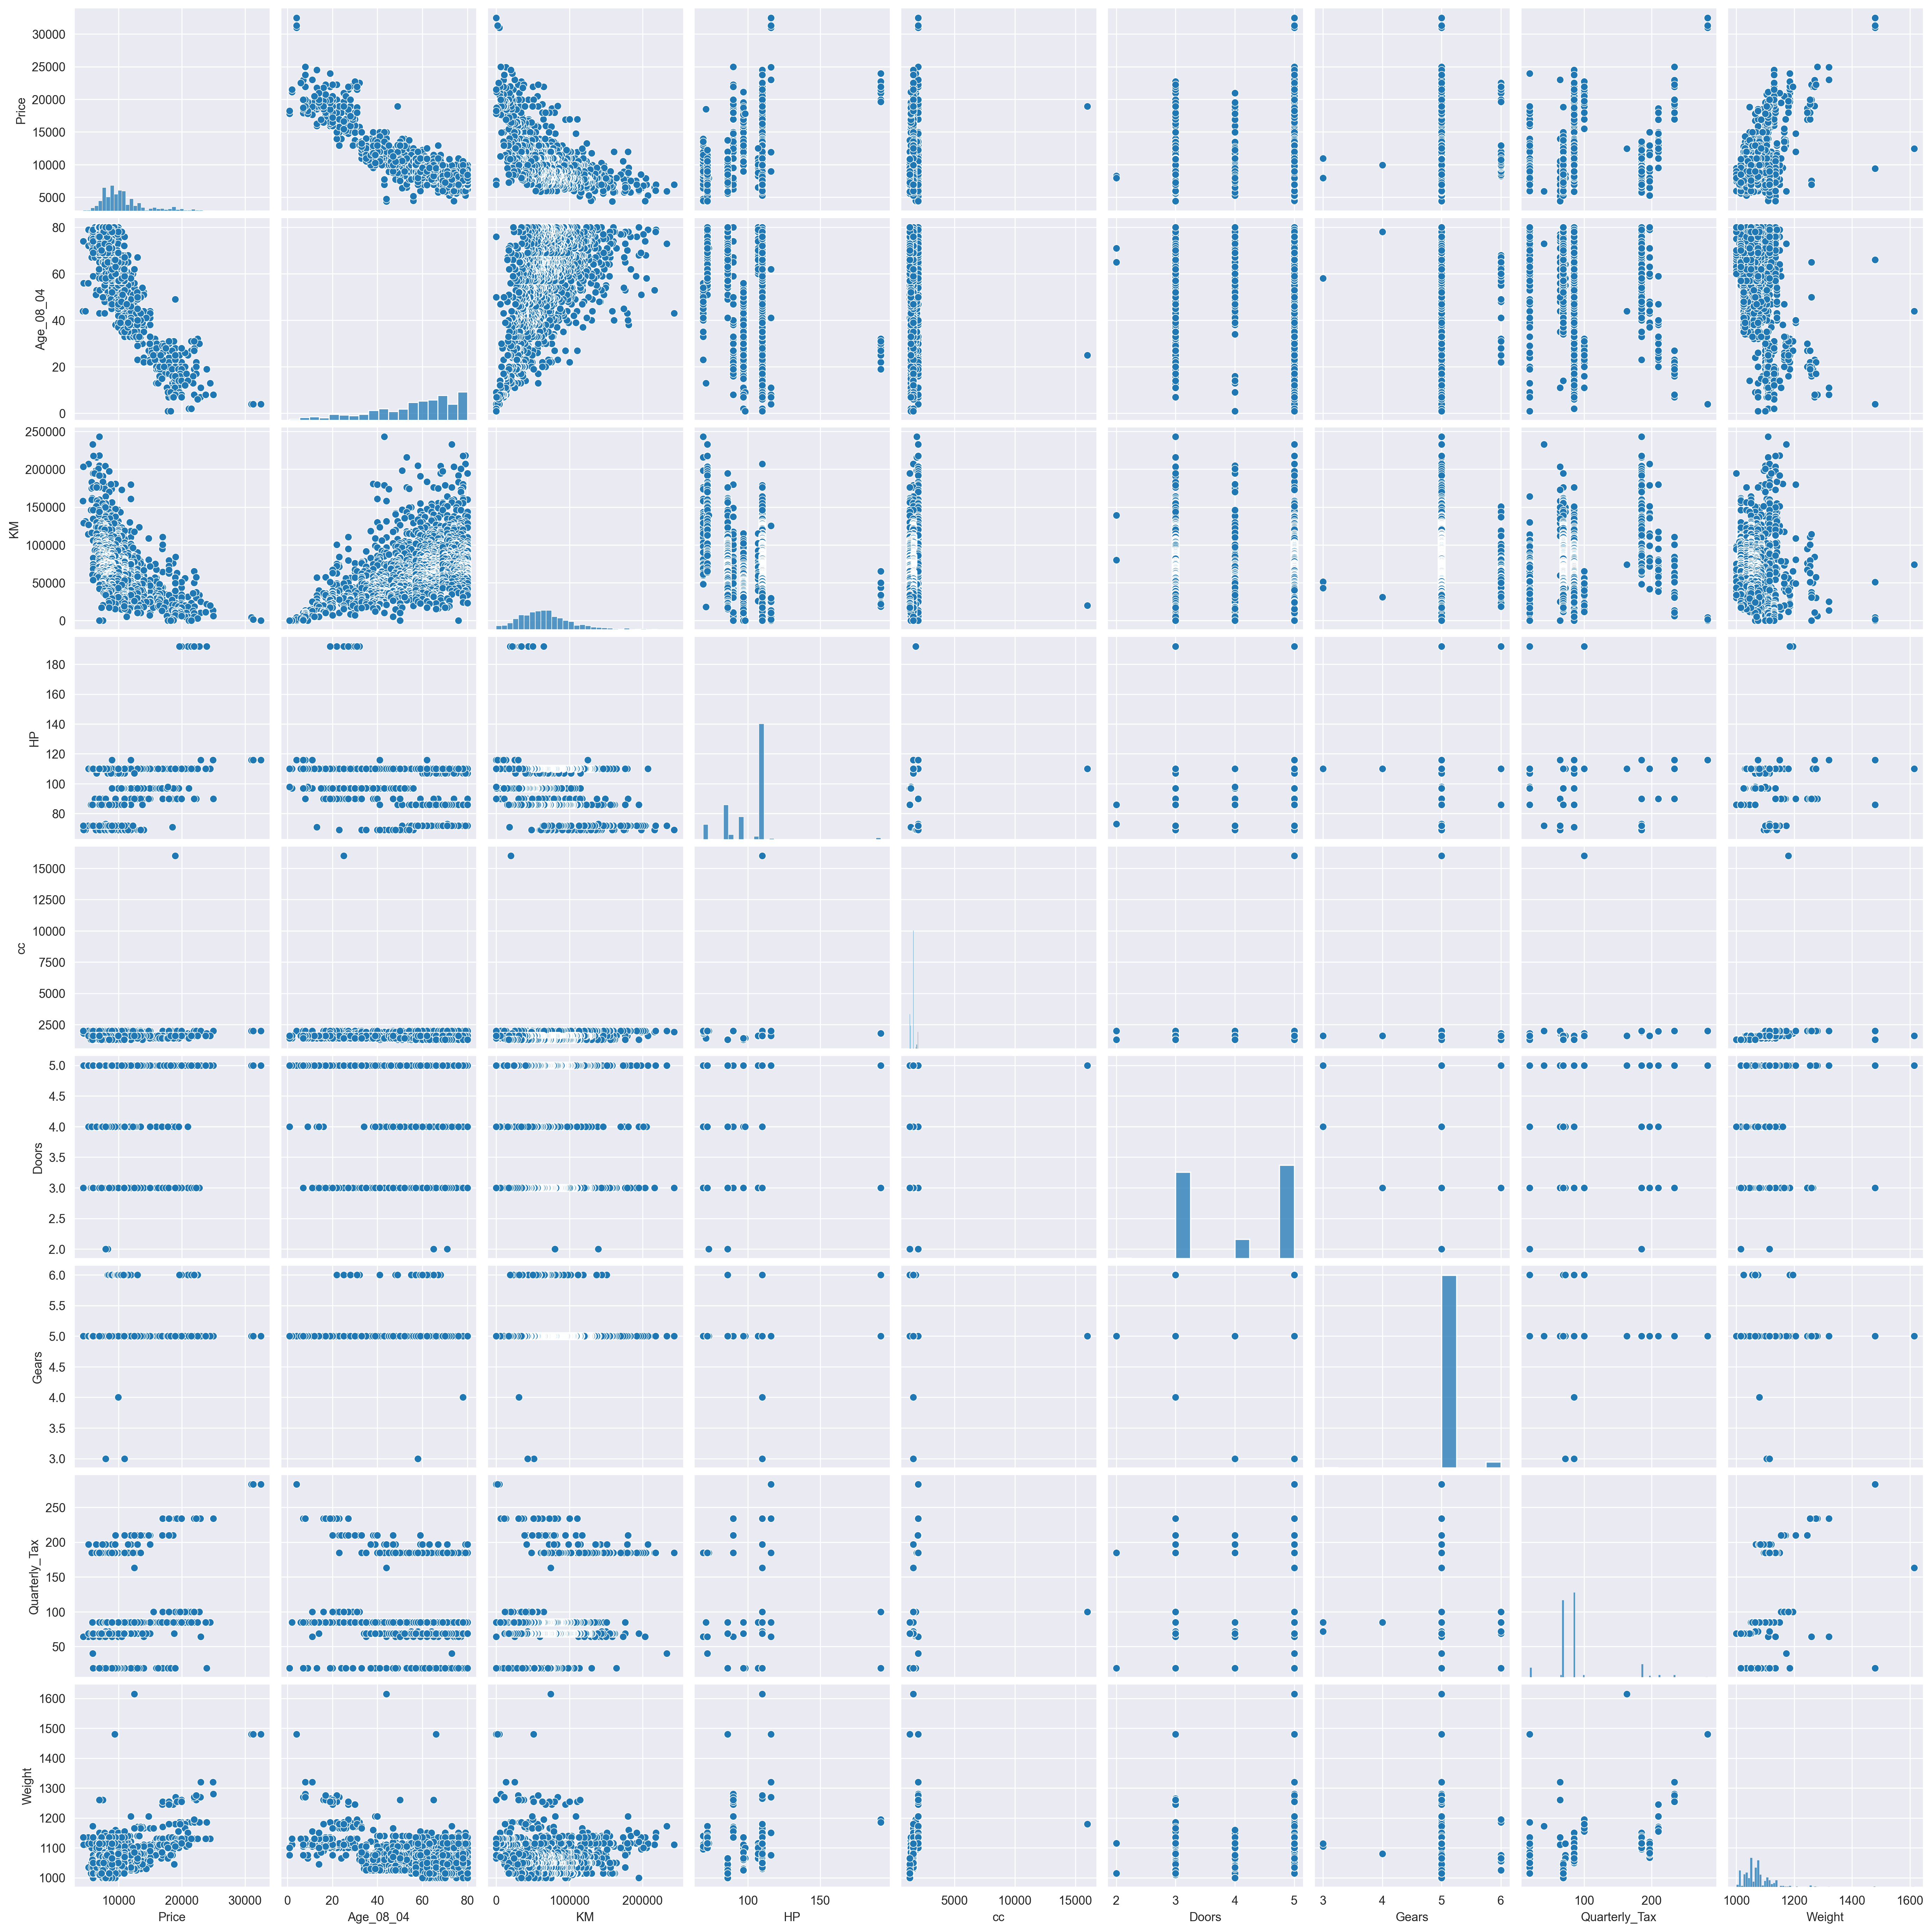

In [64]:
sns.pairplot(tc)

<Axes: >

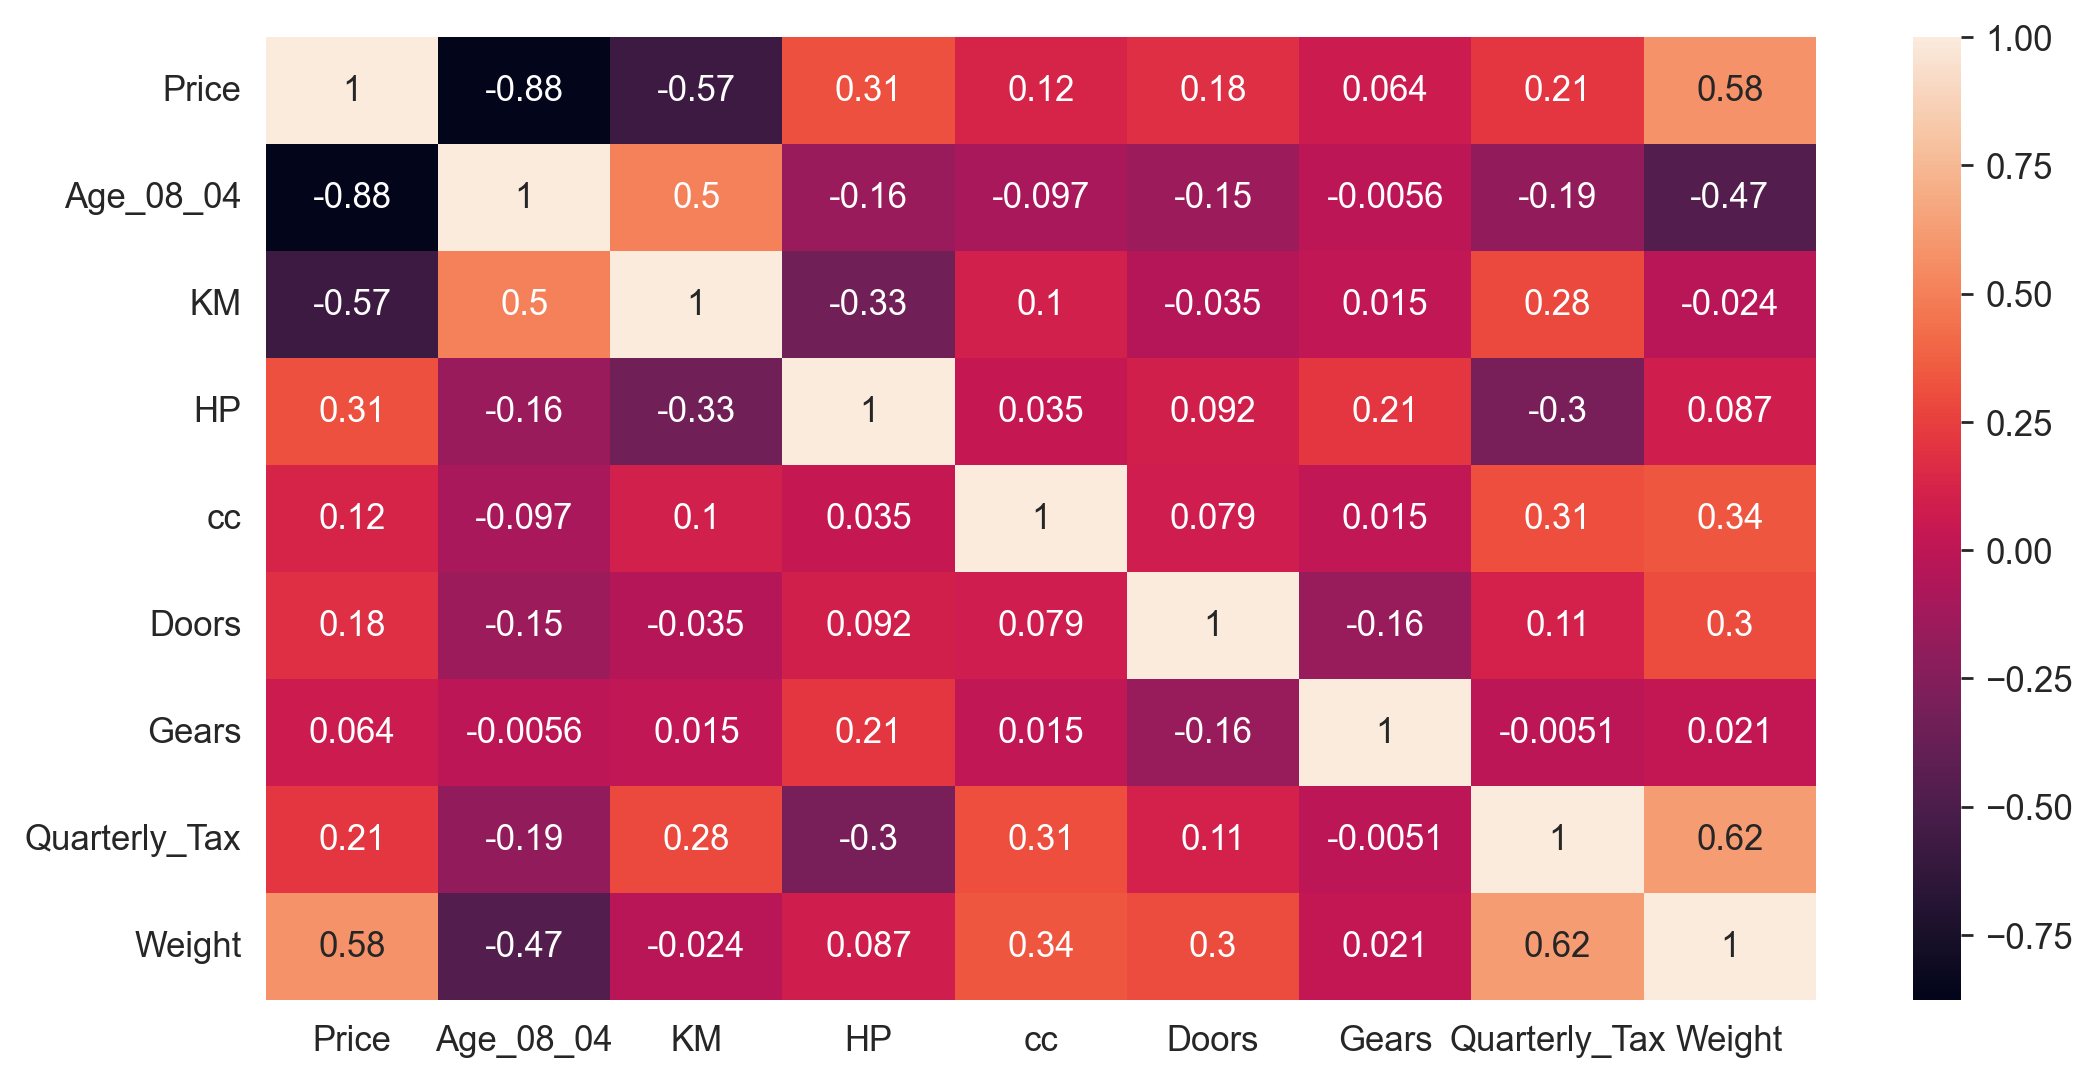

In [65]:
sns.heatmap(tc.corr(),annot=True) #no multicolinearity 

In [66]:
import statsmodels.formula.api as smf

In [67]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tc).fit()

In [87]:
model.params

Intercept       -2442.198734
Age_08_04        -121.891859
KM                 -0.020584
HP                 33.264678
Quarterly_Tax       3.885376
Weight             16.491789
dtype: float64

In [70]:
np.round(model.pvalues,5)

Intercept        0.00011
Age_08_04        0.00000
KM               0.00000
HP               0.00000
cc               0.18824
Doors            0.98164
Gears            0.00245
Quarterly_Tax    0.00329
Weight           0.00000
dtype: float64

In [14]:
#"Age_08_04," "KM," "HP," "Gears," "Quarterly_Tax," and "Weight" are close to 0,
#indicating that these variables are statistically significant predictors of "Price" 
#"cc" and "Doors" have p-values greater than 0.05, suggesting that they are not important

In [71]:
cc = smf.ols('Price~cc',data = tc).fit()
cc.pvalues
#p value for cc is > alpha so fail to reject ho

Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64

In [72]:
Doors = smf.ols('Price~Doors',data = tc).fit()
Doors.pvalues
#p value for Doors is > alpha so fail to reject ho

Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64

In [17]:
#p-values for 'cc' and 'Doors' are higher than the significance level α (0.05). 
#Therefore fail to reject the null hypothesis for both variables, 
#suggesting that there is not enough evidence to conclude that 'cc' or 'Doors' 
#has a statistically significant relationship with the price of the car. 
#These variables may not be meaningful predictors of the car price.

In [18]:
#VIF 

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
data = tc.drop(columns=['Price'])
data

Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0            23  46986   90  2000      3      5            210    1165
1            23  72937   90  2000      3      5            210    1165
2            24  41711   90  2000      3      5            210    1165
3            26  48000   90  2000      3      5            210    1165
4            30  38500   90  2000      3      5            210    1170
...         ...    ...  ...   ...    ...    ...            ...     ...
1430         69  20544   86  1300      3      5             69    1025
1431         72  19000   86  1300      3      5             69    1015
1432         71  17016   86  1300      3      5             69    1015
1433         70  16916   86  1300      3      5             69    1015
1434         76      1  110  1600      5      5             19    1114

[1435 rows x 8 columns]

In [75]:
vif = pd.DataFrame() #empty data frame
vif

Empty DataFrame
Columns: []
Index: []

In [76]:
vif['Features'] = data.columns
vif

Features
0      Age_08_04
1             KM
2             HP
3             cc
4          Doors
5          Gears
6  Quarterly_Tax
7         Weight

In [77]:
vif['VIF'] = [variance_inflation_factor(data,i) for i in range(len(data.columns))]

In [78]:
vif

Features         VIF
0      Age_08_04   16.392665
1             KM    7.601207
2             HP   64.894446
3             cc   17.186097
4          Doors   21.856114
5          Gears  439.672599
6  Quarterly_Tax   11.021647
7         Weight  543.522036

In [25]:
#weight and Gears have highest multicolinearity 

In [26]:
#AIC 

In [79]:
cc = smf.ols('Price~cc+Age_08_04+KM+HP+Quarterly_Tax',data = tc).fit()
cc.rsquared, cc.aic

(0.8364053230109219, 24993.97325464981)

In [80]:
Doors = smf.ols('Price~Doors+Age_08_04+KM+HP+Quarterly_Tax',data = tc).fit()
Doors.rsquared, Doors.aic

(0.8374664615120854, 24984.634969579103)

In [81]:
Weight = smf.ols('Price~Weight+Age_08_04+KM+HP+Quarterly_Tax',data = tc).fit()
Weight.rsquared, Weight.aic

(0.8614194757081628, 24755.848884844676)

In [82]:
Gears = smf.ols('Price~Gears+Age_08_04+KM+HP+Quarterly_Tax',data = tc).fit()
Gears.rsquared, Gears.aic

(0.8368067422994536, 24990.44780644549)

In [83]:
#P-values: 'cc' and 'Doors' have high p-values (> 0.05), 
#indicating they are not statistically significant predictors.


#VIF: 'Weight' and 'Gears' exhibit extremely high VIF values,
#indicating strong multicollinearity between them.

#AIC: 'Weight' has the lowest AIC value,
#suggesting a significant predictor. 

#Given this analysis, it is reccomended to drop 'cc', 'Doors', and 'Gears'

In [84]:
#Residual Analysis

In [85]:
model = smf.ols('Price~Age_08_04 + KM + HP + Quarterly_Tax + Weight', data=tc).fit()

In [86]:
model.rsquared

0.8614194757081628

In [35]:
import statsmodels.api as sm

In [37]:
model.resid

0      -3309.829606
1      -2525.663512
2      -2846.516458
3      -1473.282215
4      -2463.718321
           ...     
1430   -1257.329588
1431    2586.482736
1432      78.752931
1433   -1295.197292
1434   -3448.789044
Length: 1435, dtype: float64

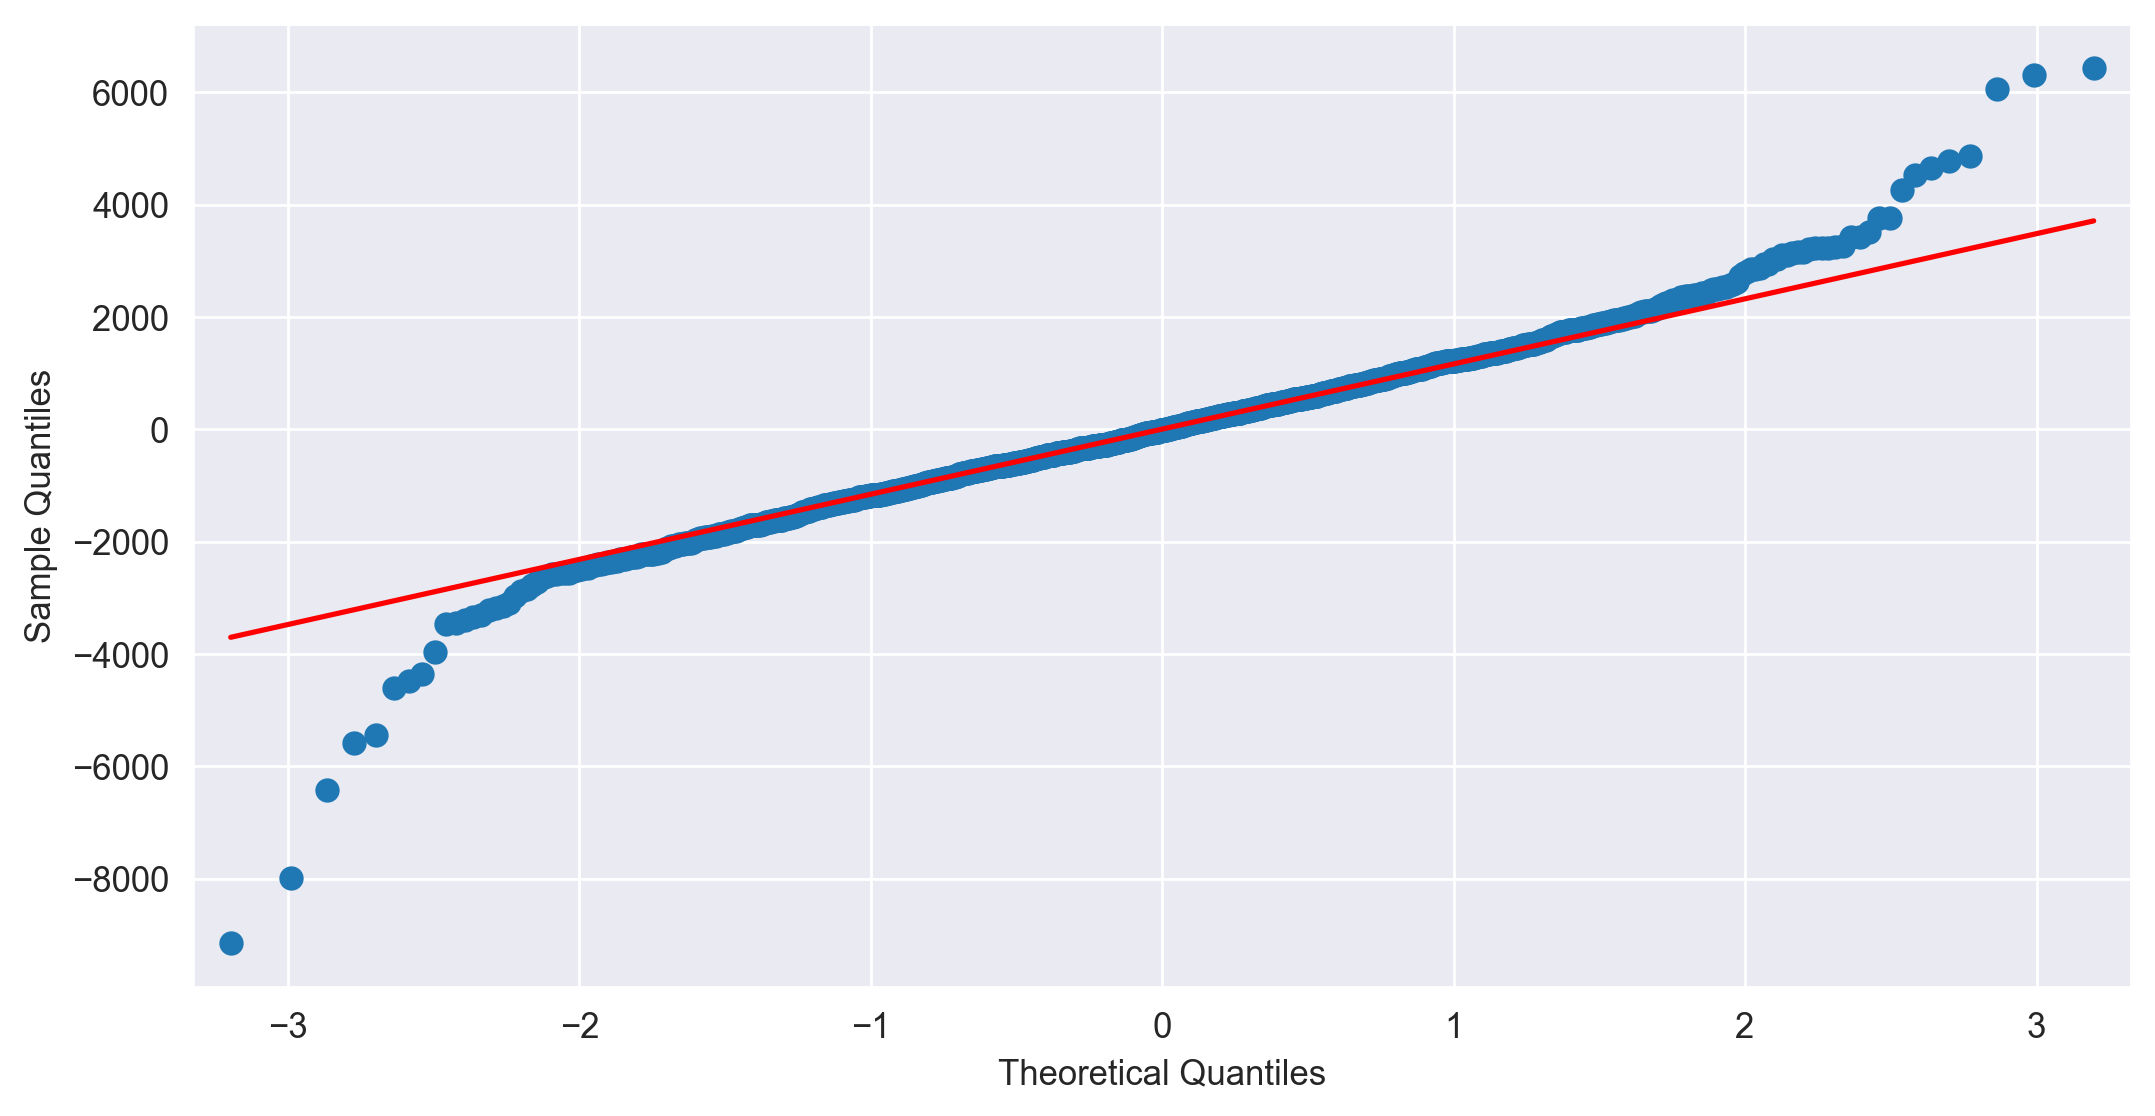

In [38]:
sm.qqplot(model.resid, line = 'q');

In [39]:
np.argmax(model.resid), np.max(model.resid)

(522, 6428.826236645684)

In [40]:
model.params

Intercept       -2442.198734
Age_08_04        -121.891859
KM                 -0.020584
HP                 33.264678
Quarterly_Tax       3.885376
Weight             16.491789
dtype: float64

In [41]:
model.fittedvalues

0       16809.829606
1       16275.663512
2       16796.516458
3       16423.282215
4       16213.718321
            ...     
1430     8757.329588
1431     8258.517264
1432     8421.247069
1433     8545.197292
1434    10398.789044
Length: 1435, dtype: float64

Text(0, 0.5, 'Errors')

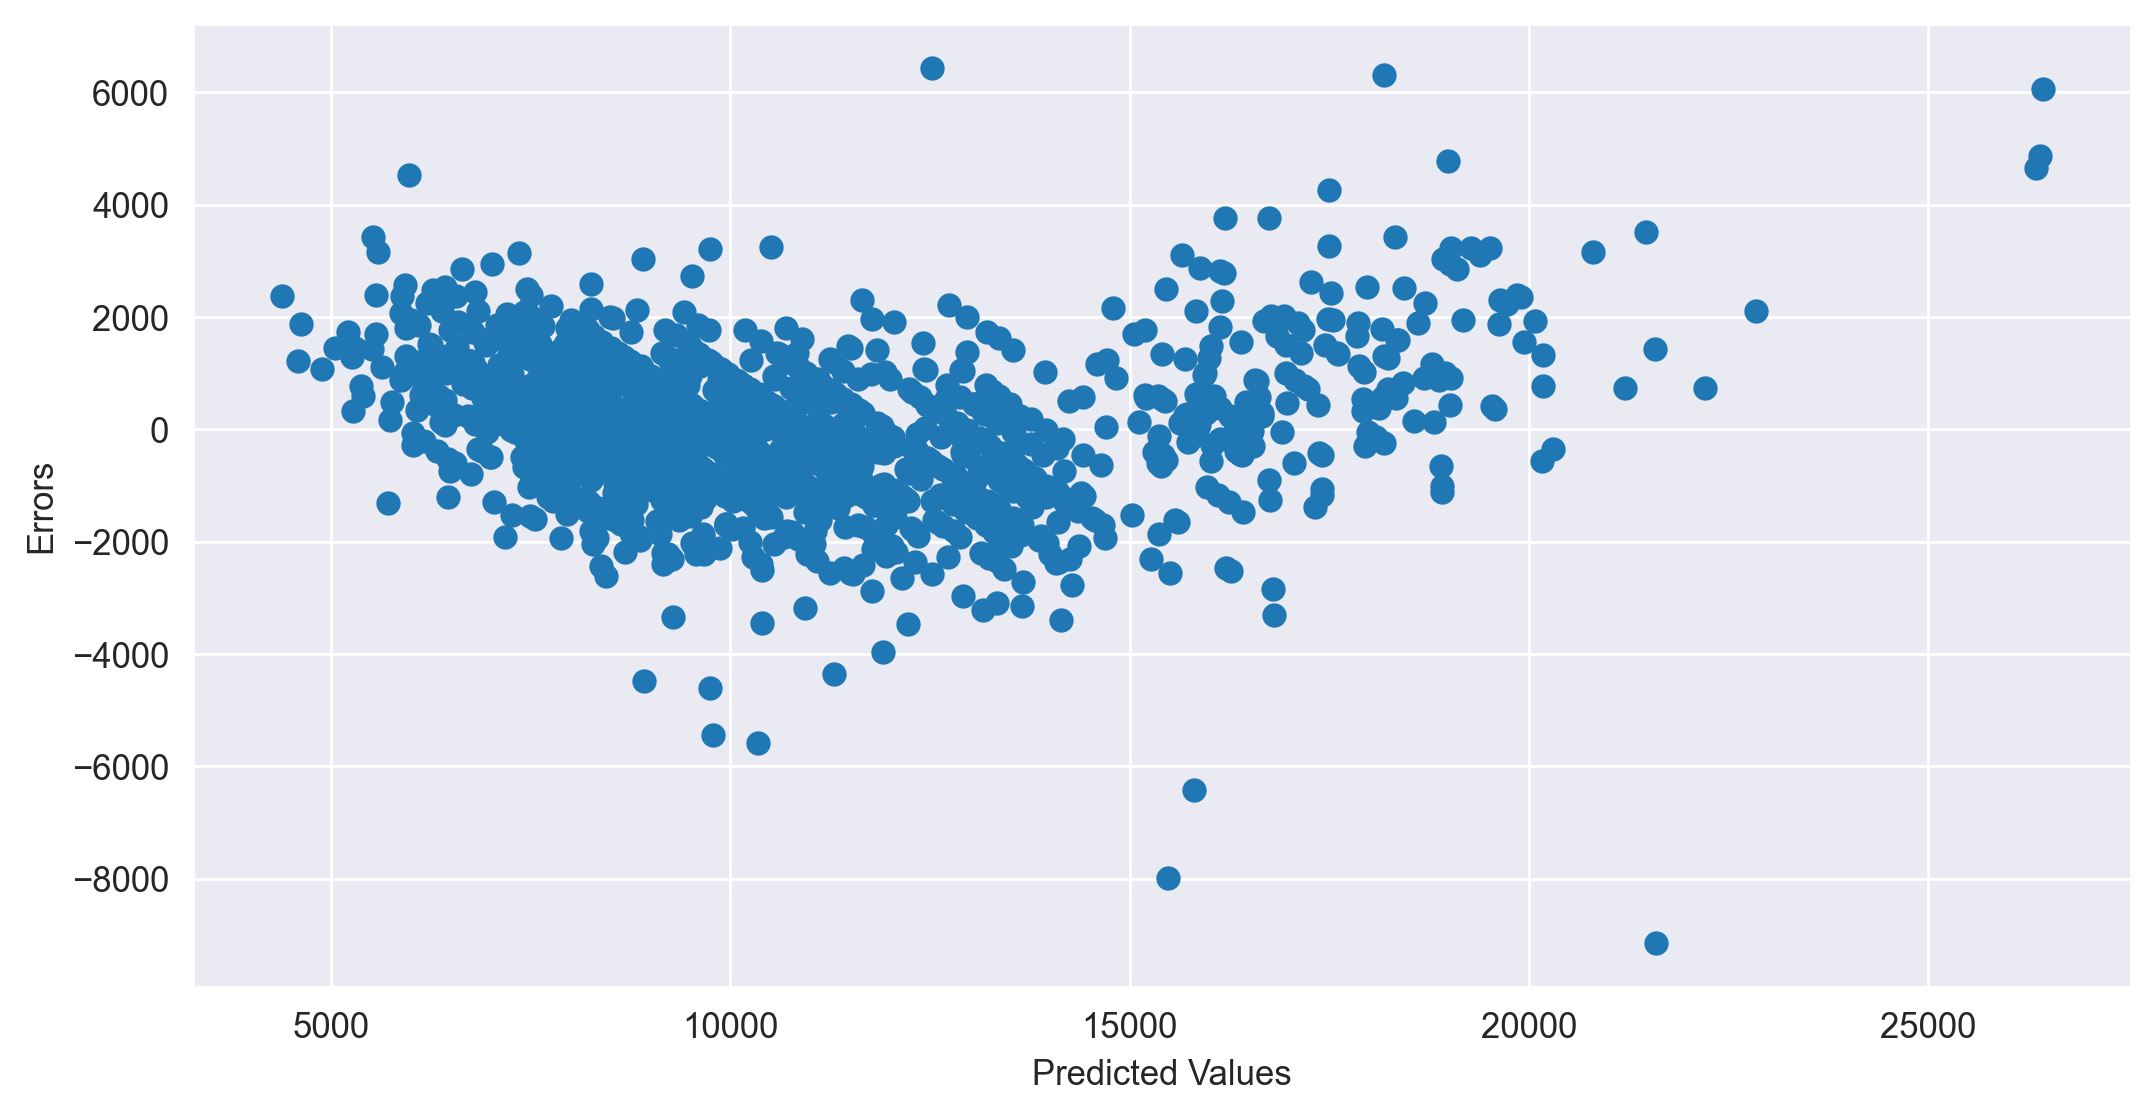

In [42]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')

In [43]:
#u shape suggest errors 

In [44]:
model

In [45]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c,p = inf.cooks_distance

In [46]:
c

array([9.28089686e-03, 5.02629452e-03, 7.03024763e-03, ...,
       3.52562432e-06, 9.31797902e-04, 1.58501757e-02])

Text(0, 0.5, 'Cooks Distance')

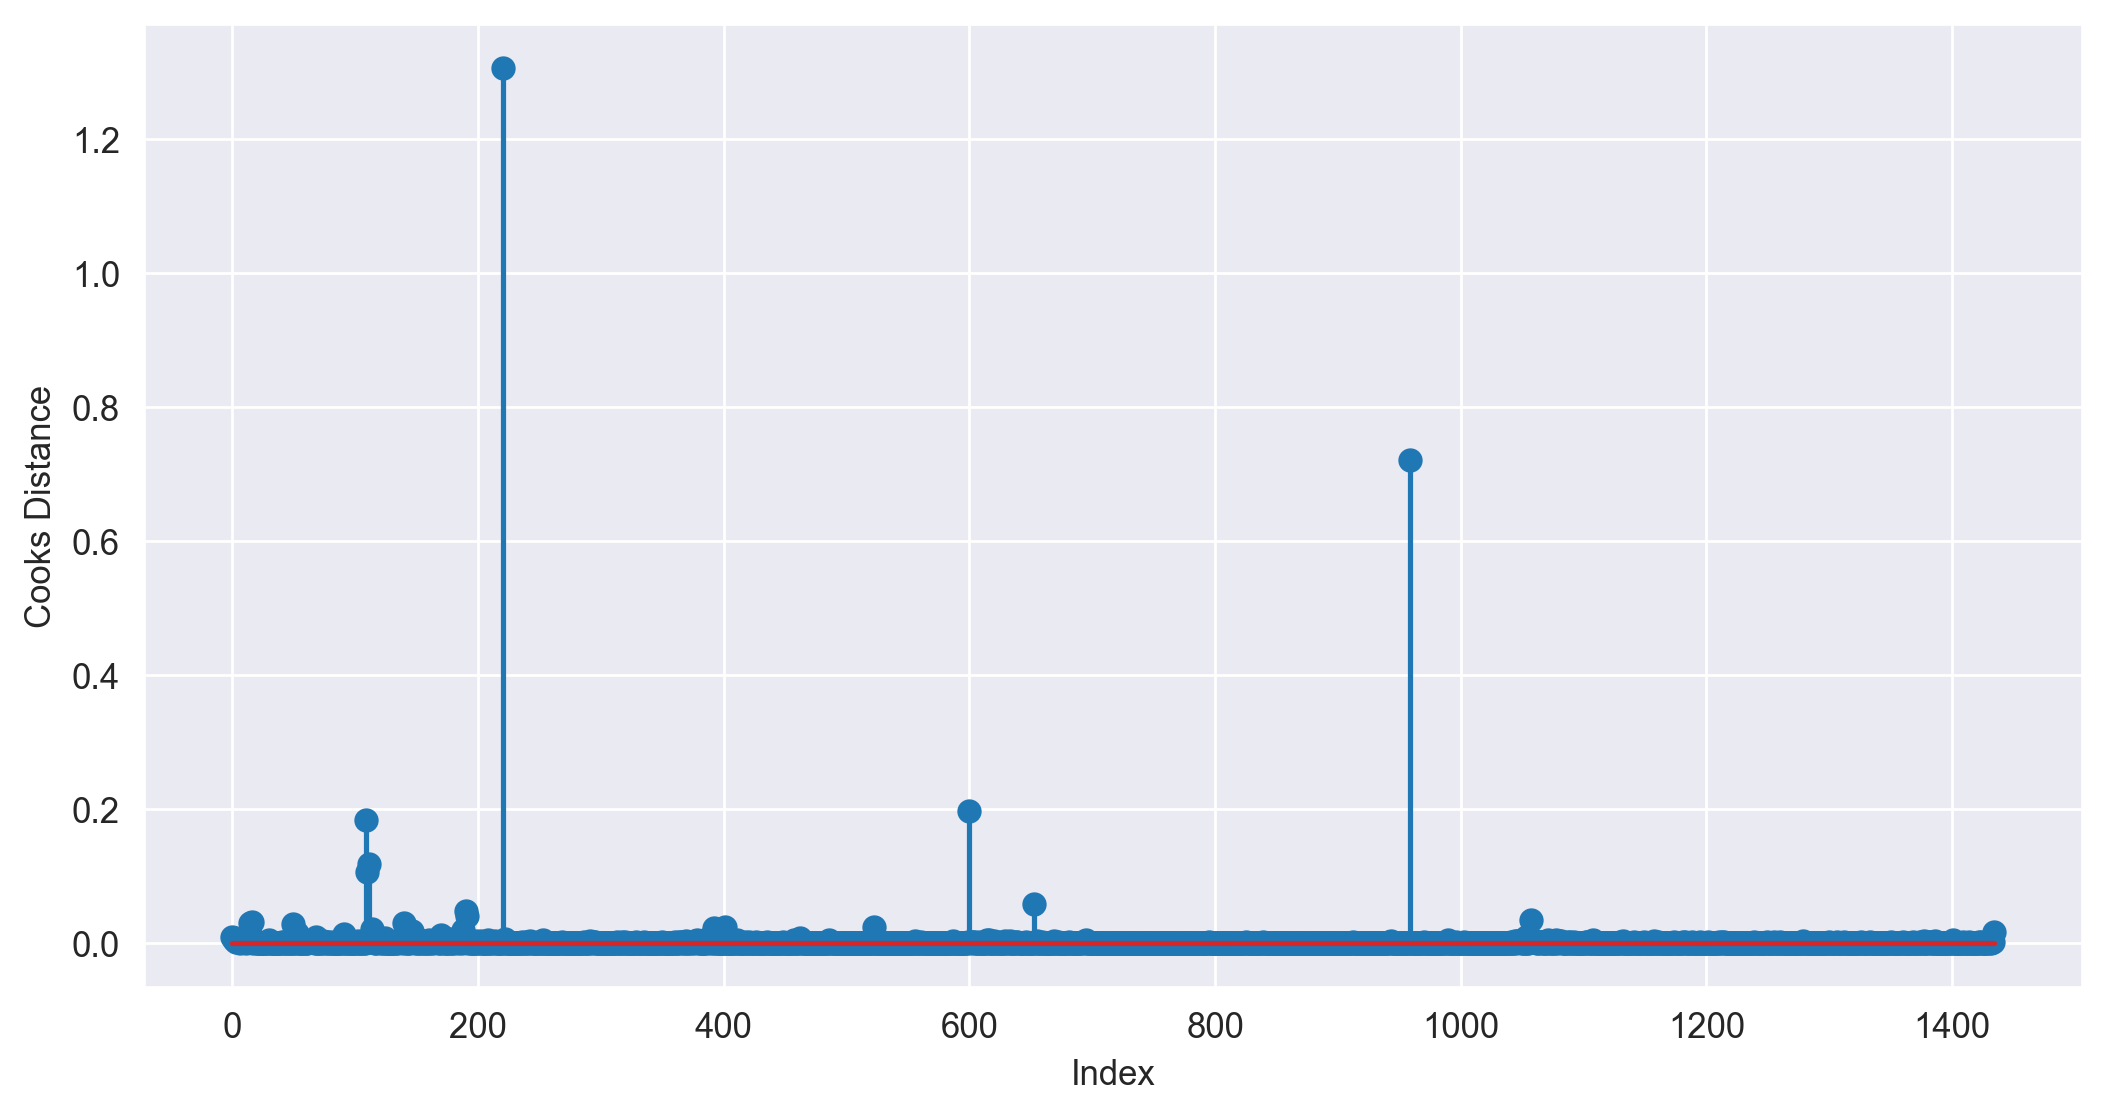

In [47]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [48]:
np.argmax(c), np.max(c)


(220, 1.3065582744343507)

In [88]:
tc.iloc[[220]]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
220  12450         44  74172  110  1600      5      5            163    1615

In [50]:
tc.head() 

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [51]:
from statsmodels.graphics.regressionplots import influence_plot

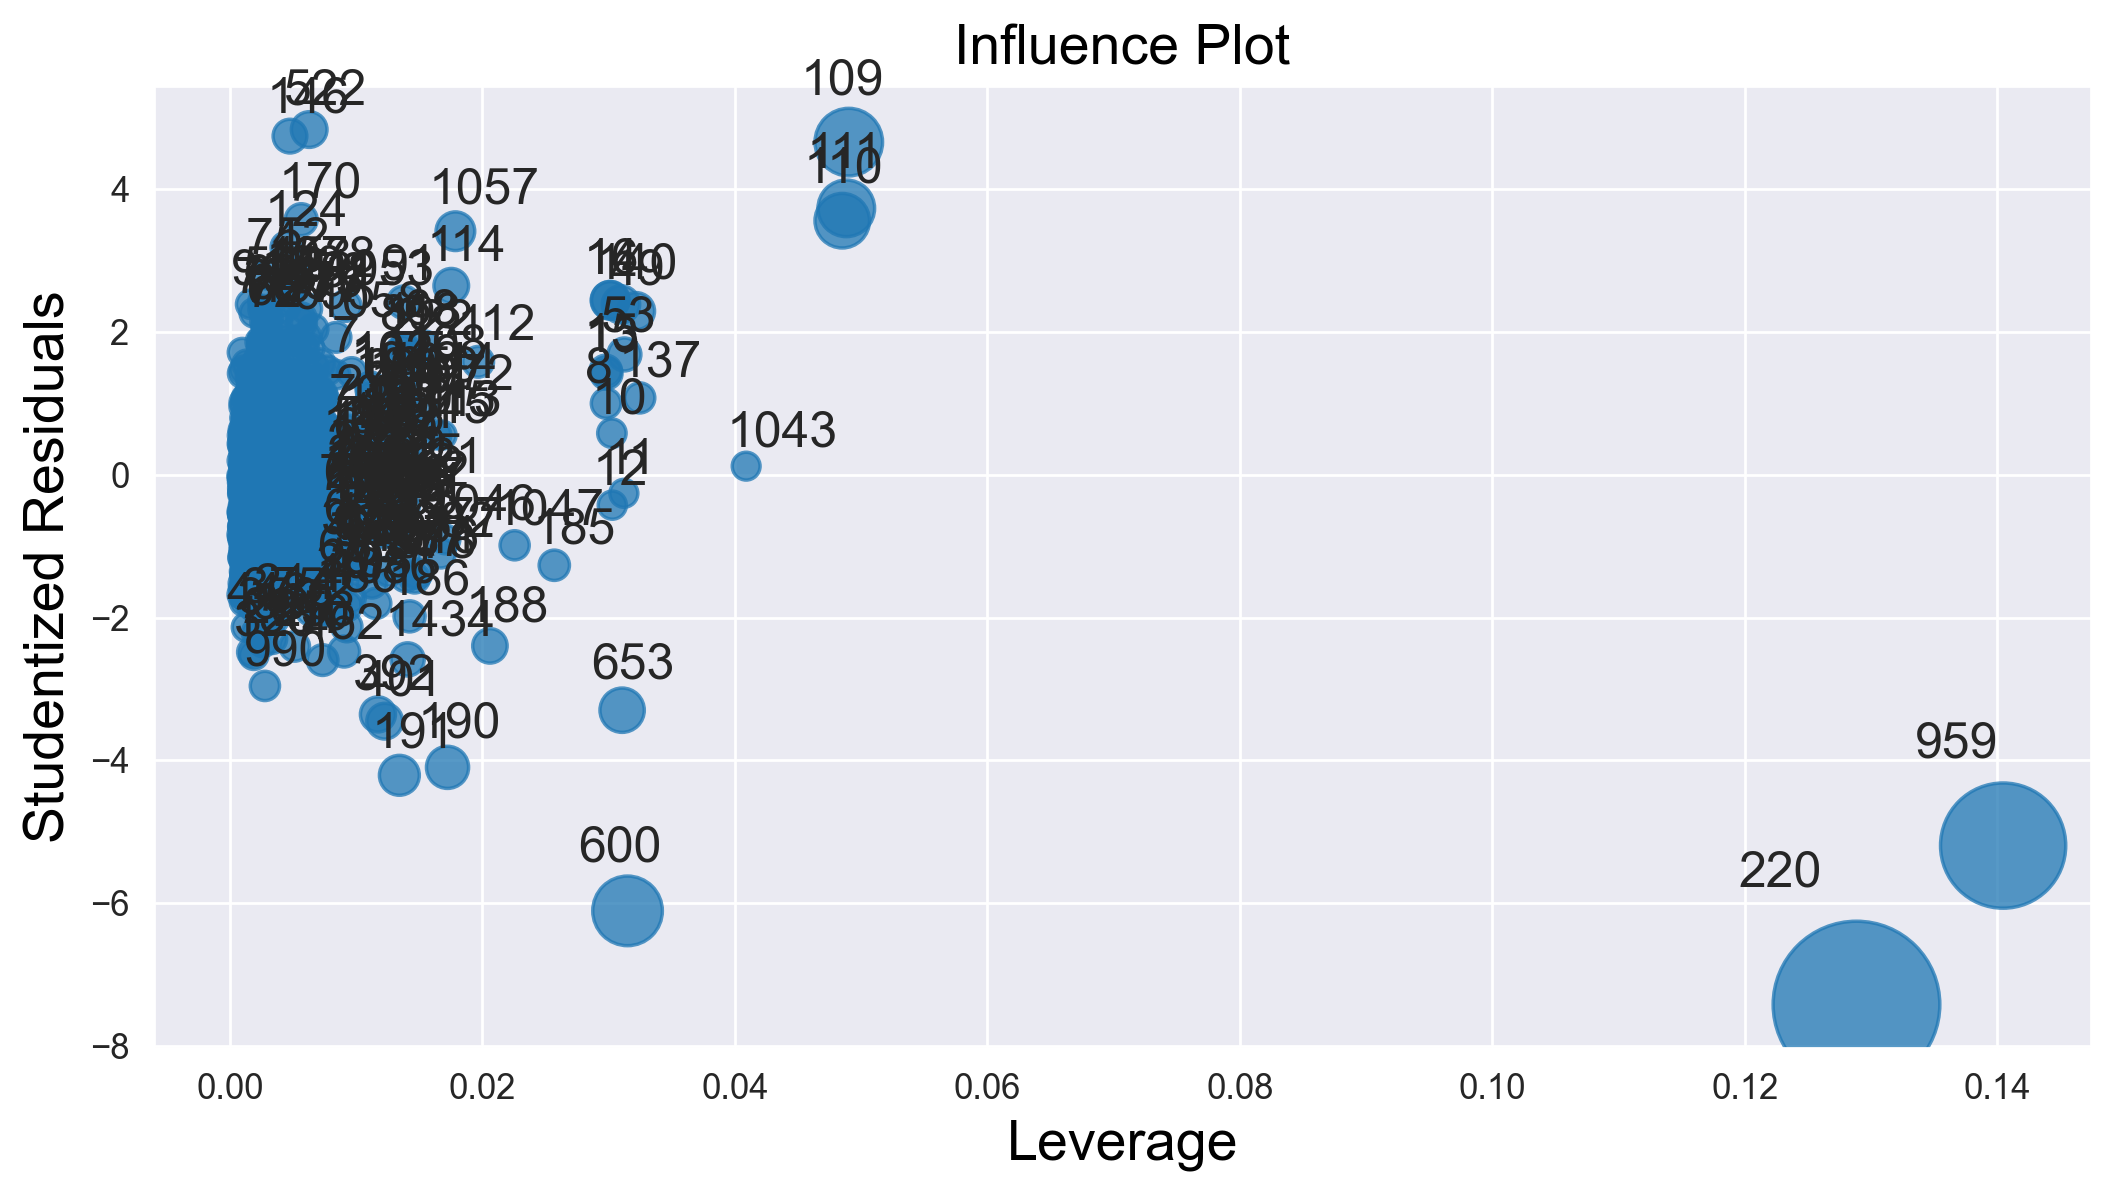

In [52]:
influence_plot(model);

In [53]:
#Calculate cutoff
k = len(tc.columns)
n = len(tc)

lv = 3*(k+1)/n
lv

0.020905923344947737

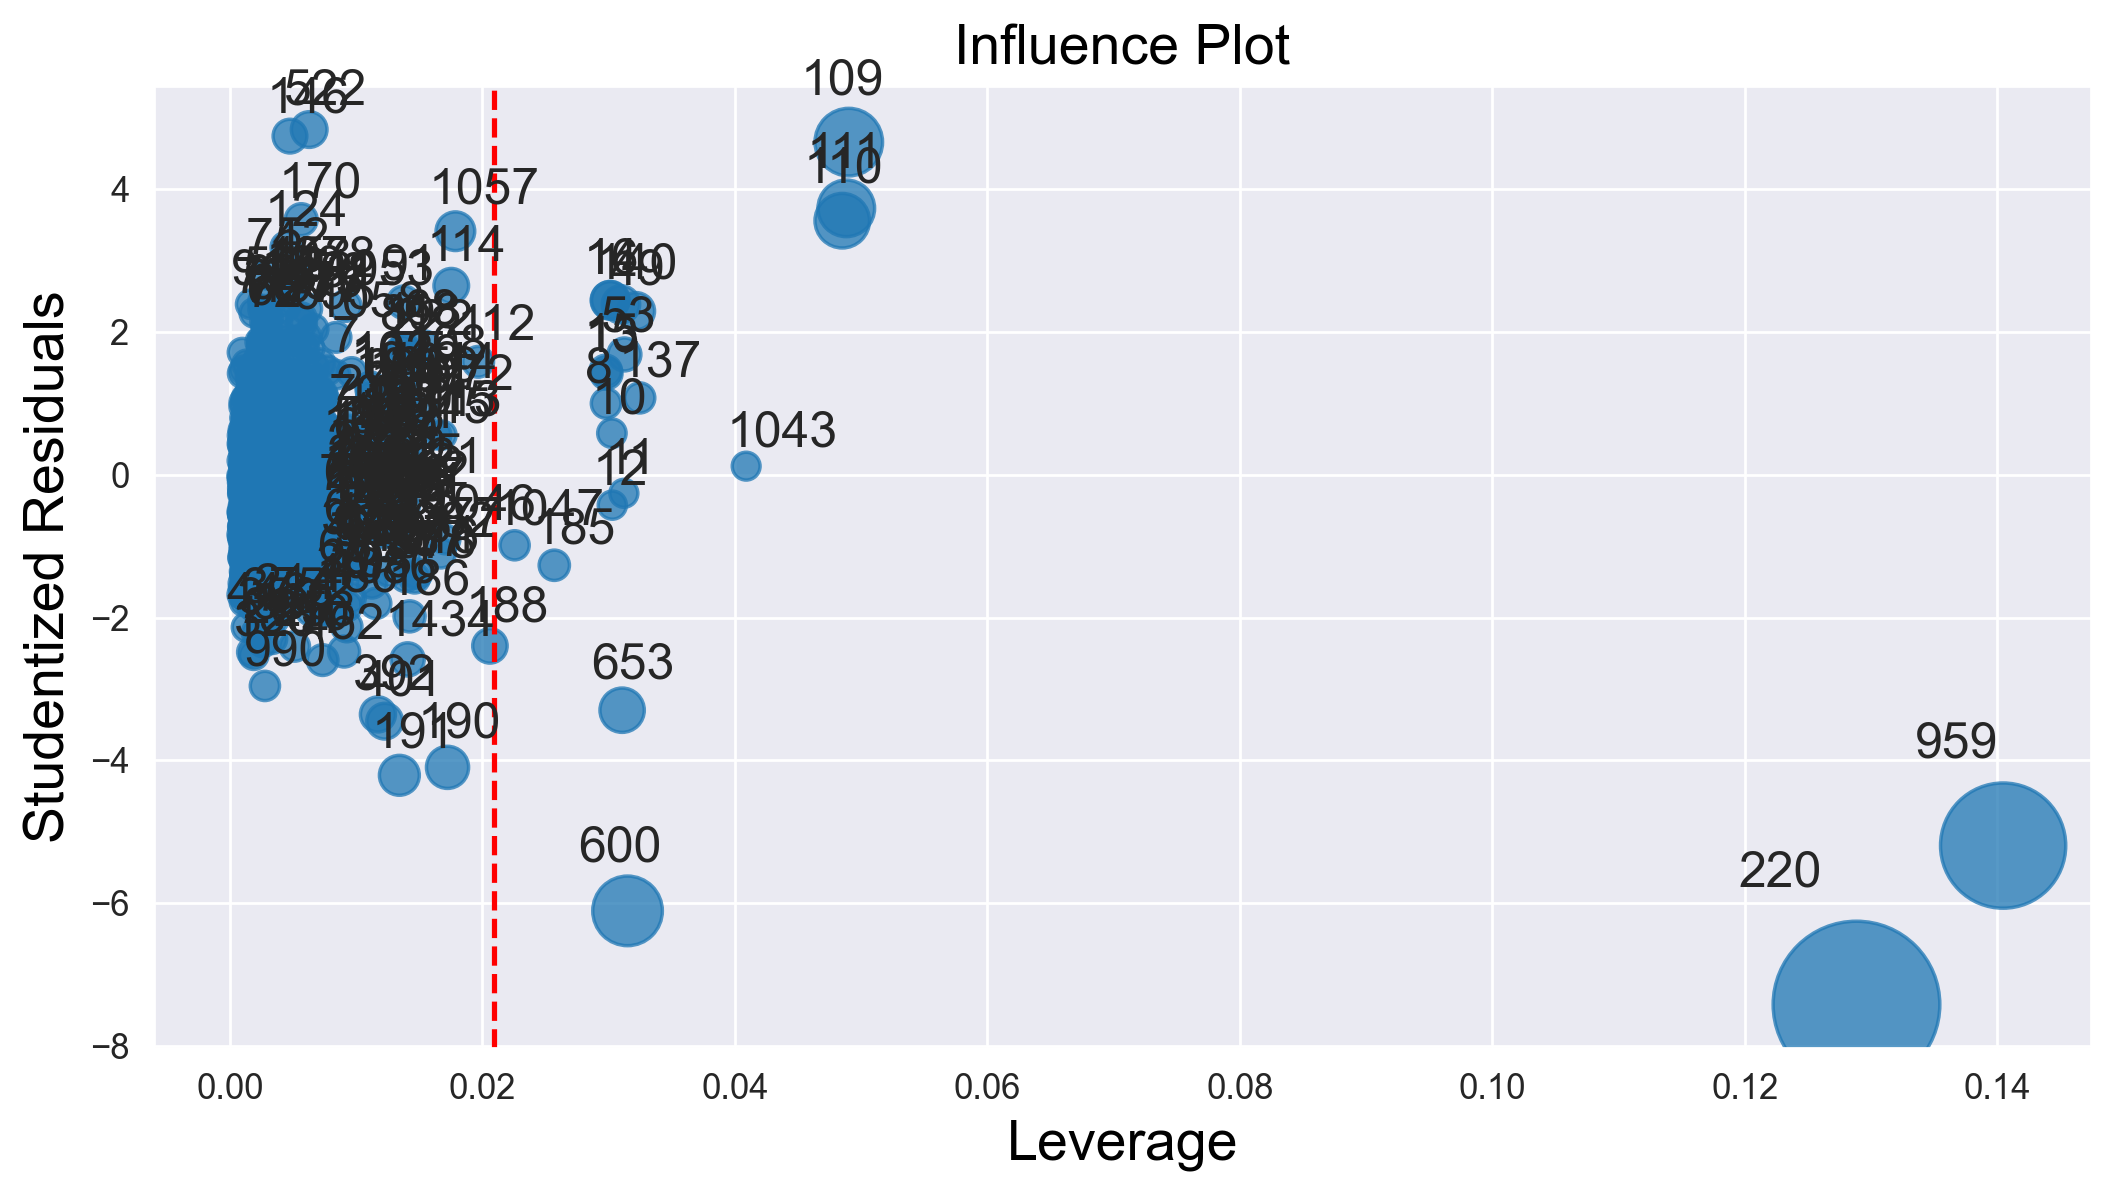

In [54]:
influence_plot(model)
plt.axvline(lv, linestyle = '--', color = 'red')


In [92]:
tc.drop(index=220,inplace=True)

KeyError: '[220] not found in axis'

In [94]:
tc

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   7500         69  20544   86  1300      3      5             69    1025
1431  10845         72  19000   86  1300      3      5             69    1015
1432   8500         71  17016   86  1300      3      5             69    1015
1433   7250         70  16916   86  1300      3      5             69    1015
1434   6950         76      1  110  1600      5      5             19    1114

[1434 rows x 9 columns]

In [95]:
tc.reset_index(inplace=True)

In [96]:
tc

index  Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  \
0         0  13500         23  46986   90  2000      3      5            210   
1         1  13750         23  72937   90  2000      3      5            210   
2         2  13950         24  41711   90  2000      3      5            210   
3         3  14950         26  48000   90  2000      3      5            210   
4         4  13750         30  38500   90  2000      3      5            210   
...     ...    ...        ...    ...  ...   ...    ...    ...            ...   
1429   1430   7500         69  20544   86  1300      3      5             69   
1430   1431  10845         72  19000   86  1300      3      5             69   
1431   1432   8500         71  17016   86  1300      3      5             69   
1432   1433   7250         70  16916   86  1300      3      5             69   
1433   1434   6950         76      1  110  1600      5      5             19   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1429    1025  
1430    1015  
1431    1015  
1432    1015  
1433    1114  

[1434 rows x 10 columns]

In [98]:
tc.drop(columns=['index'], inplace=True)

In [99]:
final_model = smf.ols('Price~Age_08_04 + KM + HP + Quarterly_Tax + Weight', data = tc).fit()

In [100]:
final_model.rsquared

0.86653814257022

In [101]:
#Predicting for new records

In [102]:
tc.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [103]:
new_data=pd.DataFrame({'Age_08_04':12,"KM":40000,"HP":80,"Quarterly_Tax":69,"Weight":1012},index=[0])
new_data

Age_08_04     KM  HP  Quarterly_Tax  Weight
0         12  40000  80             69    1012

In [104]:
final_model.predict(new_data)

0    14686.163186
dtype: float64

In [105]:
pred_y=final_model.predict(tc)
pred_y

0       16792.657448
1       16252.802199
2       16783.184328
3       16413.938579
4       16231.293573
            ...     
1429     8736.244716
1430     8217.618080
1431     8378.099225
1432     8499.387765
1433    10700.599392
Length: 1434, dtype: float64